# Task 4.9 Part 2

### Step 1

In [1]:
# Load librariers
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assign path variable
path = '/Users/mariamaske/Instacart Basket Analysis'

In [3]:
#import dataset prepared data set
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacard_basket_merged.pkl'))

In [4]:
#check success of import
df.head(10)

,user_id,first_name,last_name,sex,state,age,date_joined,n_dependants,fam_status,income,...,busiest day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_last_orders,order_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,both
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Average orders,8,New customer,7.99,Low spender,19.0,Regular customer,both
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Average orders,8,New customer,7.99,Low spender,19.0,Regular customer,both
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,both
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,both
9,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,both


In [5]:
#check shape of data
df.shape

(32404859, 33)

In [6]:
df_subset = df[:1000000]
df_subset.head(10)
df_subset.shape

(1000000, 33)

### Step 2: I did some graphs here mostly for testing purposes. All Excercise Steps are included in the 4.9 Data Visualisation file.

### Bar graph

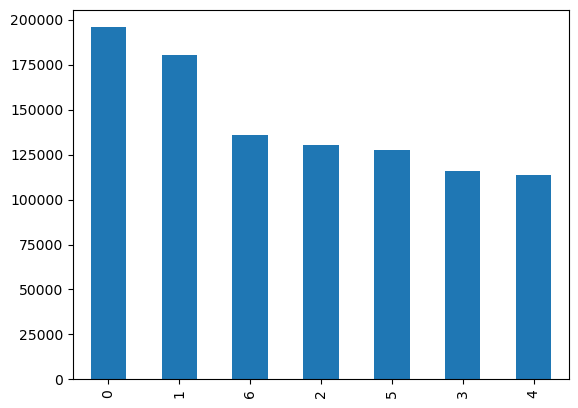

In [7]:
#create and plot a bar graph
bar_graph = df_subset['orders_day_of_week'].value_counts().plot.bar()

### Histogram

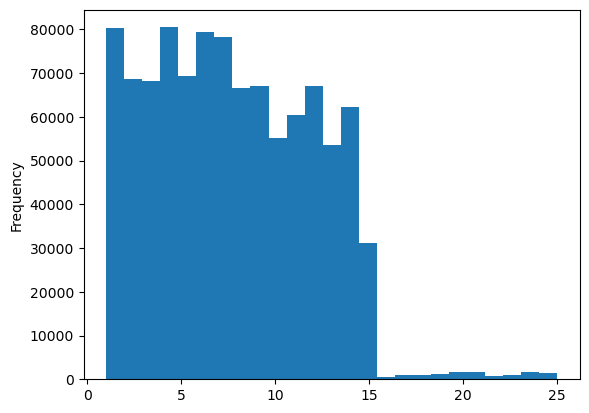

In [8]:
Hist_graph = df_subset['prices'].plot.hist(bins = 25)

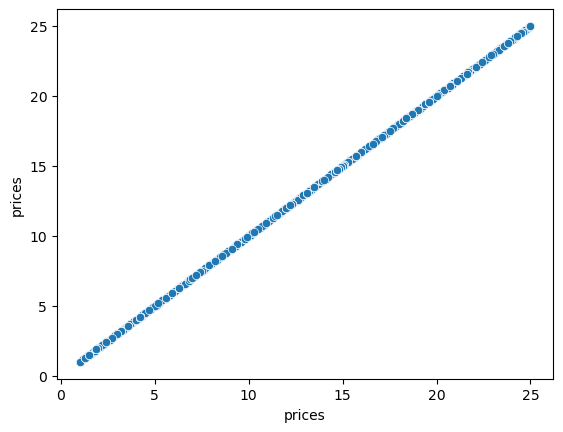

In [9]:
#use scatterplot to see if there is outliers
scatter_plot = sns.scatterplot(x = 'prices', y = 'prices',data = df_subset)

In [10]:
#check where to cut of prices? 
df_subset.loc[df_subset['prices'] > 100]

,user_id,first_name,last_name,sex,state,age,date_joined,n_dependants,fam_status,income,...,busiest day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_last_orders,order_frequency_flag,_merge


In [11]:
df.dtypes

user_id                     int64
first_name                 object
last_name                  object
sex                        object
state                      object
age                         int64
date_joined                object
n_dependants                int64
fam_status                 object
income                      int64
order_id                    int64
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
days_since_last_order     float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                    int64
department_id               int64
prices                    float64
price_range_loc            object
busiest day                object
Busiest days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
average_price             float64
spending_flag 

In [25]:
# Create an outlier function to identify the outliers for our price
def find_outliers_IQR(df):

   q1 = df.quantile(0.25)

   q3 = df.quantile(0.75)

   IQR = q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [26]:
outliers = find_outliers_IQR(df_subset['prices'])

In [27]:
print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

number of outliers: 4482
max outlier value: 25.0
min outlier value: 21.7


In [28]:
#turn into nas
df_subset.loc[df_subset['prices'] >100, 'prices'] = np.nan

In [14]:
#check max balue in prices column now afterusing nas
df_subset['prices'].max()

25.0

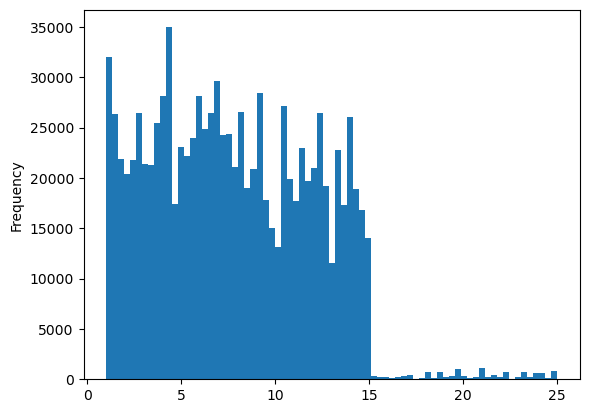

In [12]:
#recreate the histogram with the subset data
Hist_graph = df_subset['prices'].plot.hist(bins = 75)

In [29]:
#save bar chart
Hist_graph.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_hist_1000000.png'))

## Step 3 Create a histogram of the **order_hour_of_day column

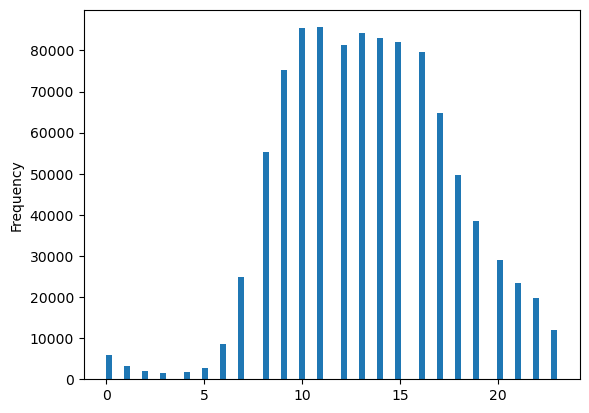

In [15]:
#recreate the histogram with the subset data
Hist_order_hour = df_subset['order_hour_of_day'].plot.hist(bins = 75)

#### Observation: The histogram shows that during the day we have more orders and to be more price. The most orders were made between the 10-17 hour of the day. Then the orders steadily decreased as people went to bed.

In [16]:
#export histogram 
Hist_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_hist1_1000000.png'))

### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

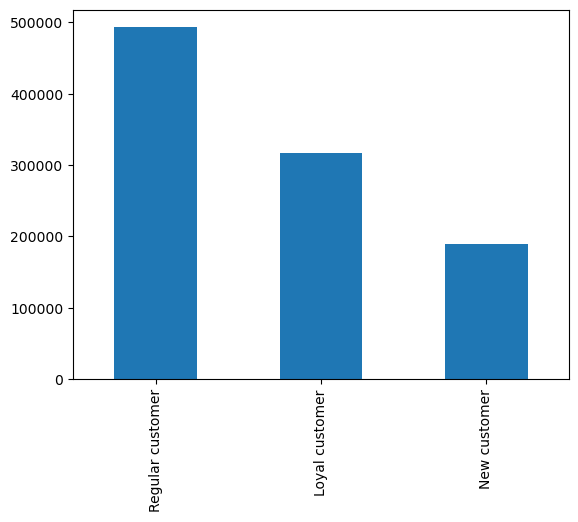

In [17]:
#create and plot a bar graph for loyalty
bar_graph1 = df_subset['loyalty_flag'].value_counts().plot.bar()

#### Obersevation: We can see from the bar graph that most of our customers are regulars.

In [18]:
#export histogram 
bar_graph1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_loyalty_1000000.png'))

### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [19]:
#create random sample of data to create this line chart
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [20]:
#create the samples big and small
big = df[dev]
small = df[~dev]

In [21]:
len(df)

32404859

In [22]:
len(big)+len(small)

32404859

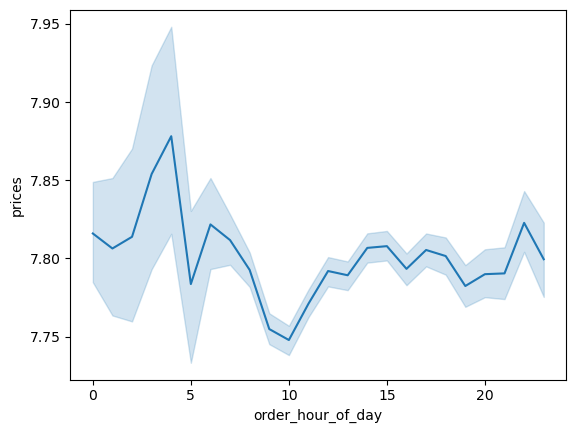

In [23]:
#plot the line graph with 30% data
line_plot = sns.lineplot(data = small, x = 'order_hour_of_day',y = 'prices')

#### Observation: We find that between the hours of early mroning more expensive produce is bought.

In [31]:
#export line 
line_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_linesmall_1000000.png'))

### Step 6 First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

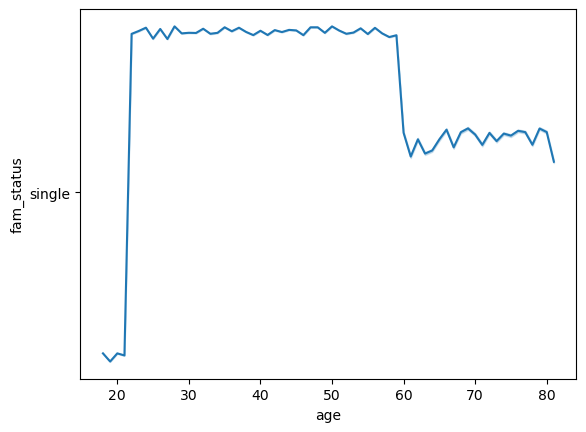

In [32]:
# between age and family
line_plot_age = sns.lineplot(data = small, x = 'age',y = 'fam_status')
#most of the customers are married

#### Observation: Most of the customers are married from an age of 20 upwards.

In [33]:
#export line 
line_plot_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_linesmall_1000000.png'))

### 7 You’ll also need to explore whether there’s a connection between age and spending power (income).

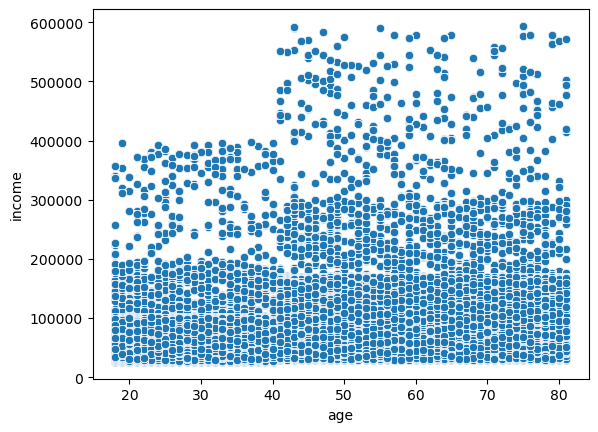

In [35]:
scatter_plot = sns.scatterplot(x = 'age', y = 'income',data = small)

#### Yes there seems to be a relationship as people above the age of 40 have a higher income.

In [36]:
#export scatter 
scatter_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_scatter_1000000.png'))